# 03_Remove Outliers using Z-Score And IQR

## What is Z-Score?
The Z-score tells you how many standard deviations a value is from the mean:

                            𝑧 = (x−μ)/σ 
x = data point
μ = mean
σ = standard deviation

## Rule of Thumb:

If ∣z∣>3, the value is typically considered an outlier (can vary depending on context).


## Remove Outliers Using Z-Score: 
1. Calculate the mean and standard deviation.
2. Compute the Z-score for each data point.
3. Filter out data points with ∣z∣>threshold (usually 3).

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Step 2: Load dataset
dataset = pd.read_csv("data.csv")
dataset.head()

,Duration,Pulse,Maxpulse,Calories
0,60.0,110.0,130.0,409.1
1,60.0,117.0,145.0,479.0
2,60.0,103.0,135.0,340.0
3,45.0,109.0,175.0,282.4
4,45.0,117.0,148.0,406.0


In [3]:
# Step 3: Check for missing values
print(dataset.isnull().sum())

Duration     7
Pulse       18
Maxpulse    11
Calories    16
dtype: int64


In [4]:
# It's important to handle missing values before calculating Z-score
dataset = dataset.dropna(subset=["Pulse"])  # Only clean 'Pulse' column for now

In [6]:
dataset.describe()

,Duration,Pulse,Maxpulse,Calories
count,146.00000,151.000000,149.000000,143.000000
mean,63.59589,107.125828,133.456376,377.916084
std,42.48222,13.721178,16.542118,272.923860
min,15.00000,80.000000,100.000000,50.300000
25%,45.00000,100.000000,123.000000,252.150000
50%,60.00000,105.000000,131.000000,319.200000
75%,60.00000,111.000000,141.000000,388.800000
max,300.00000,159.000000,184.000000,1860.400000


In [7]:
# Step 4: Calculate mean and standard deviation of the 'Pulse' column
mean = dataset["Pulse"].mean()
std = dataset["Pulse"].std()

In [8]:
# Step 5: Compute Z-score for each data point
dataset["z_score"] = (dataset["Pulse"] - mean) / std

In [9]:
# Step 6: Filter out outliers where |z| > 3
filtered_data = dataset[dataset["z_score"].abs() <= 3]

In [10]:
# Step 7: Drop z_score column if no longer needed
filtered_data = filtered_data.drop(columns=["z_score"])

🧠 Notes:
1. Z-score works best when data is normally distributed.
2. For non-normal distributions, use IQR instead.
3. You can adjust the threshold (e.g., 2.5 or 4) based on your use case.


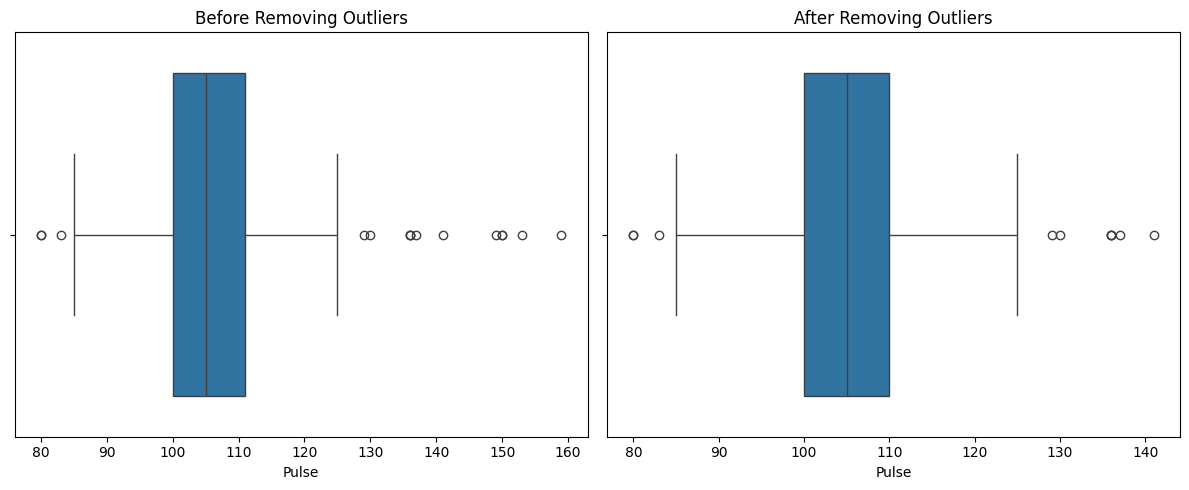

In [11]:
# Step 8: Visualize before and after
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Pulse", data=dataset)
plt.title("Before Removing Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(x="Pulse", data=filtered_data)
plt.title("After Removing Outliers")

plt.tight_layout()
plt.show()


## ✅ What is IQR Method?

**IQR (Interquartile Range)** helps detect outliers by focusing on the range between:

* **Q1 (25th percentile)**
* **Q3 (75th percentile)**

### 📌 Outlier Rules:

* **IQR = Q3 - Q1**
* **Lower Bound = Q1 - 1.5 × IQR**
* **Upper Bound = Q3 + 1.5 × IQR**
* Any value **outside this range is an outlier**.

In [12]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Step 2: Load the dataset
dataset = pd.read_csv("data.csv")

In [14]:
# Step 3: Handle missing values (optional but recommended)
# Drop rows where 'Pulse' is missing
dataset = dataset.dropna(subset=["Pulse"])

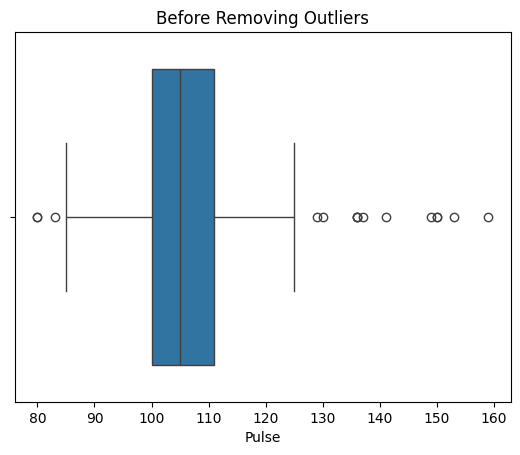

In [15]:
# Step 4: Visualize original data
sns.boxplot(x="Pulse", data=dataset)
plt.title("Before Removing Outliers")
plt.show()

In [16]:
# Step 5: Calculate Q1, Q3 and IQR for Pulse
Q1 = dataset["Pulse"].quantile(0.25)
Q3 = dataset["Pulse"].quantile(0.75)
IQR = Q3 - Q1

In [17]:
# Step 6: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR = {IQR}, Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")

IQR = 11.0, Lower Bound = 83.5, Upper Bound = 127.5


In [18]:
# Step 7: Remove outliers
filtered_data = dataset[(dataset["Pulse"] >= lower_bound) & (dataset["Pulse"] <= upper_bound)]

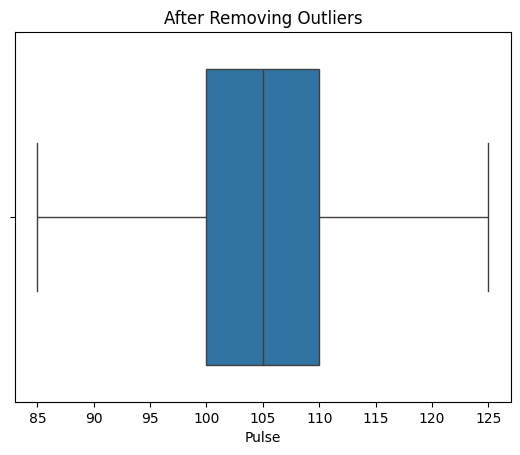

In [19]:
# Step 8: Visualize cleaned data
sns.boxplot(x="Pulse", data=filtered_data)
plt.title("After Removing Outliers")
plt.show()

In [20]:
# Step 9: Compare dataset shapes
print("Original dataset shape:", dataset.shape)
print("Cleaned dataset shape:", filtered_data.shape)

Original dataset shape: (151, 4)
Cleaned dataset shape: (136, 4)
